In [27]:
# imports

%matplotlib inline
import platform
print(platform.python_version())
from ROOT import TFile,vector
import ROOT
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from numpy import mean
from numpy import asarray
from root_pandas import read_root
import math
import json
from math import sqrt,acos,cos,sin,pi,exp,log,isnan,atan2
from textwrap import wrap
import copy

3.5.2


# This notebook makes gamma plots for the showerreco paper
inputs: pi0 pickles that have been modified to contain truth info
outputs: pickles of plots

In [28]:
# first load in pi0 pickles
tag = 'Jan_15_run1_CCPi0'
df_ccpi0_r1_goodruns_pmtprecut = pd.read_pickle('../data/pickles/%s.pickle'%tag)
tag = 'Jan_15_run3_CCPi0'
df_ccpi0_r3_goodruns_pmtprecut = pd.read_pickle('../data/pickles/%s.pickle'%tag)
tag = 'Jan_15_run1_NCPi0'
df_ncpi0_r1_goodruns_pmtprecut = pd.read_pickle('../data/pickles/%s.pickle'%tag)
tag = 'Jan_15_run3a_NCPi0'
df_ncpi0_r3a_goodruns_pmtprecut = pd.read_pickle('../data/pickles/%s.pickle'%tag)
tag = 'Jan_15_run3b_NCPi0'
df_ncpi0_r3b_goodruns_pmtprecut = pd.read_pickle('../data/pickles/%s.pickle'%tag)

# combine r3a,r3b files
df_ncpi0_r3_goodruns_pmtprecut = df_ncpi0_r3a_goodruns_pmtprecut.append(df_ncpi0_r3b_goodruns_pmtprecut)

In [29]:
# apply selection 
cuts_new = 'PassPMTPrecut ==1 and PassShowerReco ==1 and InFiducial ==1 and _pi0mass_new<400 and DeltaMass_new >0 and DeltaMass_new <1400 and NTracks ==2 and Proton_Edep>60.0  and Electron_Edep>35.0  and shower1_E_Y_new>80 and ChargeNearTrunk >250 and Electron_ThetaRecoB_e1ep <1.5 and _shower_alpha <2.5 and _pi0mass_new>0 and BDTscore_1e1p<.7'
RSE = ['run','subrun','event']
sort = 'shower1_E_Y'
df_ccpi0_r1_pi0 = df_ccpi0_r1_goodruns_pmtprecut.query(cuts_new)
df_ccpi0_r1_pi0 = df_ccpi0_r1_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_ccpi0_r3_pi0 = df_ccpi0_r3_goodruns_pmtprecut.query(cuts_new)
df_ccpi0_r3_pi0 = df_ccpi0_r3_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_ncpi0_r1_pi0 = df_ncpi0_r1_goodruns_pmtprecut.query(cuts_new)
df_ncpi0_r1_pi0 = df_ncpi0_r1_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_ncpi0_r3_pi0 = df_ncpi0_r3_goodruns_pmtprecut.query(cuts_new)
df_ncpi0_r3_pi0 = df_ncpi0_r3_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
print("pi0 lengths: ", len(df_ccpi0_r1_pi0), len(df_ccpi0_r3_pi0), len(df_ncpi0_r1_pi0), len(df_ncpi0_r3_pi0))

pi0 lengths:  1121 1011 1134 1174


In [30]:
# get variable lists I need for plots Ereco,Etrue,Enclosed Q from each df (1=lead,2=sublead)

EReco1_CC1=df_ccpi0_r1_pi0['gamma_lead_recoE'].values
EReco2_CC1=df_ccpi0_r1_pi0['gamma_sub_recoE'].values
ETrue1_CC1=df_ccpi0_r1_pi0['gamma_lead_trueE'].values
ETrue2_CC1=df_ccpi0_r1_pi0['gamma_sub_trueE'].values
QReco1_CC1=df_ccpi0_r1_pi0['gamma_lead_recoQ'].values
QReco2_CC1=df_ccpi0_r1_pi0['gamma_sub_recoQ'].values

EReco1_CC3=df_ccpi0_r3_pi0['gamma_lead_recoE'].values
EReco2_CC3=df_ccpi0_r3_pi0['gamma_sub_recoE'].values
ETrue1_CC3=df_ccpi0_r3_pi0['gamma_lead_trueE'].values
ETrue2_CC3=df_ccpi0_r3_pi0['gamma_sub_trueE'].values
QReco1_CC3=df_ccpi0_r3_pi0['gamma_lead_recoQ'].values
QReco2_CC3=df_ccpi0_r3_pi0['gamma_sub_recoQ'].values

EReco1_NC1=df_ncpi0_r1_pi0['gamma_lead_recoE'].values
EReco2_NC1=df_ncpi0_r1_pi0['gamma_sub_recoE'].values
ETrue1_NC1=df_ncpi0_r1_pi0['gamma_lead_trueE'].values
ETrue2_NC1=df_ncpi0_r1_pi0['gamma_sub_trueE'].values
QReco1_NC1=df_ncpi0_r1_pi0['gamma_lead_recoQ'].values
QReco2_NC1=df_ncpi0_r1_pi0['gamma_sub_recoQ'].values

EReco1_NC3=df_ncpi0_r3_pi0['gamma_lead_recoE'].values
EReco2_NC3=df_ncpi0_r3_pi0['gamma_sub_recoE'].values
ETrue1_NC3=df_ncpi0_r3_pi0['gamma_lead_trueE'].values
ETrue2_NC3=df_ncpi0_r3_pi0['gamma_sub_trueE'].values
QReco1_NC3=df_ncpi0_r3_pi0['gamma_lead_recoQ'].values
QReco2_NC3=df_ncpi0_r3_pi0['gamma_sub_recoQ'].values

In [32]:
# lets make an energy resolution variables for first and second showers - do NC/CC seperately
# (reco-true)/true

Eres_lead_cc = []
Eres_sub_cc = []
Eres_lead_nc = []
Eres_sub_nc = []

for i in range(len(EReco1_CC1)):
    if(ETrue1_CC1[i]>0 and ETrue2_CC1[i]>0):
        Eres_lead_cc.append((EReco1_CC1[i]-ETrue1_CC1[i])/ETrue1_CC1[i])
        Eres_sub_cc.append((EReco2_CC1[i]-ETrue2_CC1[i])/ETrue2_CC1[i])
    
for i in range(len(EReco1_CC3)):
    if(ETrue1_CC3[i]>0 and ETrue2_CC3[i]>0):
        Eres_lead_cc.append((EReco1_CC3[i]-ETrue1_CC3[i])/ETrue1_CC3[i])
        Eres_sub_cc.append((EReco2_CC3[i]-ETrue2_CC3[i])/ETrue2_CC3[i])
    
for i in range(len(EReco1_NC1)):
    if(ETrue1_NC1[i]>0 and ETrue2_NC1[i]>0):
        Eres_lead_nc.append((EReco1_NC1[i]-ETrue1_NC1[i])/ETrue1_NC1[i])
        Eres_sub_nc.append((EReco2_NC1[i]-ETrue2_NC1[i])/ETrue2_NC1[i])
    
for i in range(len(EReco1_NC3)):
    if(ETrue1_NC3[i]>0 and ETrue2_NC3[i]>0):
        Eres_lead_nc.append((EReco1_NC3[i]-ETrue1_NC3[i])/ETrue1_NC3[i])
        Eres_sub_nc.append((EReco2_NC3[i]-ETrue2_NC3[i])/ETrue2_NC3[i])


/home/kmason/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars


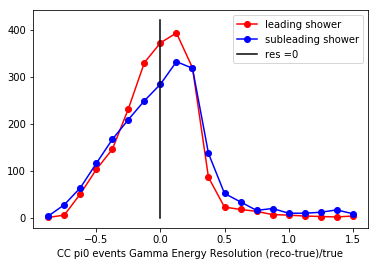

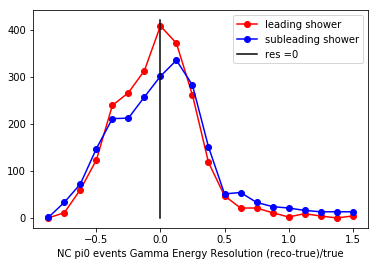

In [33]:
# Make plot and save as a pickle
# pickle.dump(  fig,  open('FigureObject.pickle',  'wb')  )

# make 3 plots, cc/nc samples + combined
# Eres_lead_comb = Eres_lead_cc.append(Eres_lead_nc)
# print(Eres_lead_cc)
# Eres_sub_comb = Eres_sub_cc.extend(Eres_sub_nc)
# # potweight the combined
# potweight_lead=[]
# potweight_sub=[]
# CCPI0_R1_POT = 6.95344e+20
# CCPI0_R3_POT = 5.92213e+20
# NCPI0_R1_POT = 2.90401e+21
# NCPI0_R3a_POT = 2.62745e+20
# NCPI0_R3b_POT = 2.22482e+21
# for i in range(len(Eres_lead_cc)):
#     potweight_lead.append(6.87e20/(CCPI0_R1_POT+CCPI0_R1_POT))
# for i in range(len(Eres_lead_nc)):
#     potweight_lead.append(6.87e20/(NCPI0_R1_POT+NCPI0_R3a_POT+NCPI0_R3b_POT))

# for i in range(len(Eres_sub_cc)):
#     potweight_sub.append(6.87e20/(CCPI0_R1_POT+CCPI0_R1_POT))
# for i in range(len(Eres_sub_nc)):
#     potweight_sub.append(6.87e20/(NCPI0_R1_POT+NCPI0_R3a_POT+NCPI0_R3b_POT))

# turn into histograms
nbins = 20
myrange=(-1,1.5)
# print(Eres_lead_cc)
Eres_lead_cc_Hist,binedges = np.histogram( Eres_lead_cc, bins = nbins, range = myrange)
Eres_sub_cc_Hist,binedges = np.histogram( Eres_sub_cc, bins = nbins, range = myrange)
Eres_lead_nc_Hist,binedges = np.histogram( Eres_lead_nc, bins = nbins, range = myrange)
Eres_sub_nc_Hist,binedges = np.histogram( Eres_sub_nc, bins = nbins, range = myrange)
# print(len(Eres_lead_comb),len(potweight_lead))
# Eres_lead_comb_Hist,binedges = np.histogram( Eres_lead_comb, bins = nbins, range = myrange,weights=potweight_lead)
# Eres_sub_comb_Hist,binedges = np.histogram( Eres_sub_comb, bins = nbins, range = myrange,weights=potweight_sub)

bincenters = np.ones(len(binedges)-1)
for i in range(len(binedges)-1):
    bincenters[i] = binedges[i]+((myrange[1]-myrange[0])/nbins)


# plot settings
plt.plot(bincenters,Eres_lead_cc_Hist,color = 'Red', marker = 'o',label = "leading shower")
plt.plot(bincenters,Eres_sub_cc_Hist,color = 'blue', marker = 'o',label = "subleading shower")
X = [0,0]
Y = [0,420]
plt.plot(X,Y,color='black',label="res =0")
plt.xlabel("CC pi0 events Gamma Energy Resolution (reco-true)/true")
plt.legend()
plt.show()
plt.close()

plt.plot(bincenters,Eres_lead_nc_Hist,color = 'Red', marker = 'o',label = "leading shower")
plt.plot(bincenters,Eres_sub_nc_Hist,color = 'blue', marker = 'o',label = "subleading shower")
plt.plot(X,Y,color='black',label="res =0")
plt.xlabel("NC pi0 events Gamma Energy Resolution (reco-true)/true")
plt.legend()
plt.show()
plt.close()

# plt.plot(bincenters,Eres_lead_comb_Hist,color = 'Red', marker = 'o',label = "leading shower")
# plt.plot(bincenters,Eres_sub_comb_Hist,color = 'blue', marker = 'o',label = "subleading shower")
# plt.plot(X,Y,color='black',label="res =0")
# plt.xlabel("Pi0 events Gamma Energy Resolution (reco-true)/true")
# plt.ylabel("POT normalized number of events")
# plt.legend()
# plt.show()
# plt.close()


# fig,ax = plt.subplots(figsize=(16,11))
# ax.hist(Eres_lead_cc,nbins,range=myrange,color='red',stacked=False,linewidth=0,label='leading shower',edgecolor='black')



In [7]:
# # define some functions from Nick's code 

# def line(x,m,b):
#     x = np.array(x)
#     return m*x + b

# def line2(x,m):
#     x = np.array(x)
#     return m*x

# def poly(x,a,b,c):
#     x = np.array(x)
#     return a*x**2 + b*x + c

# def gaus(x,x0,a,sigma):
#     x = np.array(x)
#     return a * np.exp(-(x-x0)**2 / (2*sigma**2))

# def plotProfileHist(x,y,adcRange,label,color):
#     means_result = scipy.stats.binned_statistic(x, [y,y**2], bins=20, range=adcRange, statistic='mean')
#     means, means2 = means_result.statistic
#     standard_deviations = np.sqrt(means2 - means**2)
#     bin_edges = means_result.bin_edges
#     bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
#     plt.errorbar(x=bin_centers, y=means, yerr=standard_deviations, fmt='o',label=label,color=color,capsize=3)
#     return bin_centers, means, standard_deviations

# def plotMedianHist(x,y,range,label,color):
#     means_result = scipy.stats.binned_statistic(x, y, bins=20, range=range, statistic='median')
#     means = means_result.statistic
#     bin_edges = means_result.bin_edges
#     bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
#     plt.scatter(x=bin_centers, y=means, label=label,color=color)
#     return bin_centers, means

# def fitRange(fracErrorVecTest,low,high):
#     fracErrorVecTestRanged = []
#     for i in range(len(fracErrorVecTest)):
#         if fracErrorVecTest[i] <= high and fracErrorVecTest[i] >= low:
#               fracErrorVecTestRanged.append(fracErrorVecTest[i])
#     #return norm.fit(fracErrorVecTestRanged)
#     fig = plt.figure()
#     n,b,p = plt.hist(fracErrorVecTestRanged,30,range=(low,high),density=True);
#     #plt.show()
#     plt.close(fig)
#     centers = 0.5*(b[1:] + b[:-1])
#     return curve_fit(lambda x, mu, sig : norm.pdf(x,loc=mu,scale=sig),centers,n,p0=[high/2,high/2])
#     #return curve_fit(lambda x, mu, sig, N : N*norm.pdf(x,loc=mu,scale=sig),centers,n,p0=[high/2,high/2,max(n)])
    
# def plotGausFitHist(x,y,eMax,label,color, windowFrac, ADCmin, ADCmax, plot=False, errFudge=1.0):
#     bins = 20
#     bin_centers = []
#     means = []
#     std_devs = []
#     for i in range(bins):
#         binMin = ADCmin + i*((ADCmax-ADCmin) / bins)
#         binMax = ADCmin + (i+1)*((ADCmax-ADCmin) / bins)
#         fitData = []
#         bin_centers.append((binMin + binMax)/2)
#         for j in range(len(x)):
#             _x = x[j]
#             if ((_x >= binMin) and (_x < binMax)):
#                 fitData.append(y[j])
#         fitLow = (i/bins)*((1-windowFrac)*eMax)
#         fitHigh = fitLow + windowFrac*eMax
#         pars, cov = fitRange(fitData,fitLow,fitHigh)
#         mu, sigma = pars[0],np.sqrt(cov[0,0])
#         #print(mu,'+-',sigma)
        
#         if(plot):
#             n, _bins, patches = plt.hist(fitData,50,density=True,color='r',range=(0,eMax),histtype='step')
#             _y = norm.pdf(np.arange(_bins[0],_bins[-1],10),pars[0],pars[1])
#             plt.title('ADC Range: %i to %i' %(binMin,binMax))
#             plt.xlabel('True Electron Energy [MeV]')
#             plt.plot(np.arange(_bins[0],_bins[-1],10),_y,'r--',linewidth=2)
#             plt.show()
        
        
#         means.append(mu)
#         std_devs.append(sigma*errFudge)
        
#     plt.errorbar(x=bin_centers, y=means, yerr=std_devs, fmt='.k',label=label,capsize=3,color='r')
#     return bin_centers, means, std_devs

# def plotFracResGausFitHist(x,y,Emin,Emax):
#     bins = 20
#     bin_centers = []
#     means = []
#     means_err = []
#     std_devs = []
#     std_devs_err = []
#     for i in range(bins):
#         binMin = Emin + i*((Emax-Emin) / bins)
#         binMax = Emin + (i+1)*((Emax-Emin) / bins)
#         fitData = []
#         bin_centers.append((binMin + binMax)/2)
#         for j in range(len(x)):
#             _x = x[j]
#             if ((_x >= binMin) and (_x < binMax)):
#                 fitData.append(y[j])
#         pars, cov = fitRange(fitData,-1,2)
#         mu, sigma = pars[0],pars[1]
#         muerr,sigmaerr = np.sqrt(cov[0,0]),np.sqrt(cov[1,1])
        
#         means.append(mu)
#         means_err.append(muerr)
#         std_devs.append(sigma)
#         std_devs_err.append(sigmaerr)
        
#     return bin_centers, means, std_devs, means_err, std_devs_err

# def plotMPV(x,y,eMax,label,color, windowFrac, ADCmin, ADCmax):
#     bins = 20
#     bin_centers = []
#     means = []
#     std_devs_low = []
#     std_devs_high = []
#     errs = []
#     for i in range(bins):
#         binMin = ADCmin + i*((ADCmax-ADCmin) / bins)
#         binMax = ADCmin + (i+1)*((ADCmax-ADCmin) / bins)
#         fitData = []
#         bin_centers.append((binMin + binMax)/2)
#         for j in range(len(x)):
#             _x = x[j]
#             if ((_x >= binMin) and (_x < binMax)):
#                 fitData.append(y[j])
        
#         fig = plt.figure()
#         n, _bins, patches = plt.hist(fitData,100,density=True,color='r',range=(0,2*eMax),histtype='step')
#         plt.clf()
#         plt.cla()
#         plt.close(fig)
#         bc = 0.5*(_bins[0:-1]+_bins[1:])
#         mu = bc[np.argmax(n)]
#         firstSide = False
#         secondSide = False
#         fs = -1
#         ss = -1
#         for i,d in enumerate(n):
#             if not firstSide and d > np.max(n)/2:
#                 fs = bc[i]
#                 firstSide = True
#             if firstSide and not secondSide and d < np.max(n)/2:
#                 ss = bc[i]
#                 secondSide = True
        
        
#         means.append(mu)
#         std_devs_low.append(fs)
#         std_devs_high.append(ss)
#         errs.append(np.std(np.array(fitData))/np.sqrt(len(fitData)))
        
#     mns = 0.5*(np.array(std_devs_low) + np.array(std_devs_high))
#     std = np.array(std_devs_high)-mns
#     plt.errorbar(x=bin_centers, y=means, yerr=errs, fmt='.k',label=label,capsize=3,color='r')
#     return bin_centers, means, errs

# def plotMG(x,y,eMax,label,color,windowFrac, ADCmin, ADCmax):
#     bins = 20
#     bin_centers = []
#     means = []
#     errs = []
#     for i in range(bins):
#         binMin = ADCmin + i*((ADCmax-ADCmin) / bins)
#         binMax = ADCmin + (i+1)*((ADCmax-ADCmin) / bins)
#         fitData = []
#         bin_centers.append((binMin + binMax)/2)
#         for j in range(len(x)):
#             _x = x[j]
#             if ((_x >= binMin) and (_x < binMax)):
#                 fitData.append(y[j])
        
        
#         means.append(np.mean(np.array(fitData)))
#         errs.append(np.std(np.array(fitData))/np.sqrt(len(fitData)))
        

#     plt.errorbar(x=bin_centers, y=means, yerr=errs, fmt='.k',label=label,capsize=3,color='r')
#     return bin_centers, means, errs

# def getErecoOld(qU,qV,qY):
#     return qU*0.0139 + 31.5,qV*0.0143 + 35.7,qY*0.0125 + 13.8

# def getErecoOldY(qY):
#     return 0.013456*qY + 2.06955

# def getEreco(qU,qV,qY):
#     return 0.0155481*qU,0.01586385*qV,0.01319672*qY

# def getErecoSelOnly(qU,qV,qY):
#     return 0.01492218*qU,0.01533911*qV,0.01255796*qY
    
# def getErecoPoly(qU,qV,qY):
#     return poly(qU,8.95228723e-10, 1.50690814e-02, 1.56982711e+01), \
#            poly(qV,-2.11542238e-09, 1.56626467e-02, 1.15464447e+01), \
#            poly(qY,3.64375818e-08, 1.07069173e-02, 3.87865989e+01), \

# def getErecoMPV(qU,qV,qY):
#     return 0.01462882*qU,0.01513484*qV,0.01212416*qY

# def binarySearch(rsev,rsev_list):
#     N = len(rsev_list)
    
#     if N==1: 
#         if rsev == [int(rsev_list[0][i]) for i in range(3)]: return (rsev_list[0])[-1]
#         else: return -1
#     rsev_test = rsev_list[int(N/2)]
#     for i in range(3):
#         if rsev[i] > int(rsev_test[i]):
#             return binarySearch(rsev,rsev_list[int(N/2):])
#         elif rsev[i] < int(rsev_test[i]):
#             return binarySearch(rsev,rsev_list[:int(N/2)])
#     return rsev_test[-1]

In [ ]:
# etruearr_el = []

# erecoUarr = []
# erecoVarr = []
# erecoYarr = []
# erecompvUarr = []
# erecompvVarr = []
# erecompvYarr = []
# erecoselUarr = []
# erecoselVarr = []
# erecoselYarr = []

# fracerrorU = []
# fracerrorV = []
# fracerrorY = []
# fracerrormpvU = []
# fracerrormpvV = []
# fracerrormpvY = []
# fracerrorselU = []
# fracerrorselV = []
# fracerrorselY = []

# sumQUarr = []
# sumQVarr = []
# sumQYarr = []

# fracerror1 = []
# fracerror2 = []
# fracerror3 = []



# clusterConsistencyArr = []
# diffarr = []
# enuarr = []


# selectedOnly = False

# jsave = [0,1,2,3,4]


# for j,(data_str,sel_list) in enumerate(zip(["mcc9_v28_wctagger_nueintrinsics_meta_clusterCalib.txt",
#                                             "mcc9_v29e_dl_run2_bnb_intrinsics_nue_overlay_meta_clusterCalib.txt",
#                                             "mcc9_v29e_dl_run3b_bnb_intrinsic_nue_overlay_nocrtremerge_meta_clusterCalib.txt",
#                                             "mcc9_v29e_dl_run1_bnb_intrinsic_nue_LowE_meta_clusterCalib.txt",
#                                             "mcc9_v29e_dl_run3b_bnb_intrinsic_nue_LowE_meta_clusterCalib.txt"],
#                                             [sel_r1,sel_r2,sel_r3,sel_low_r1,sel_low_r3])):

#     if j not in jsave: continue
#     print(data_str)
#     data = np.loadtxt(data_str)
#     for i,entry in enumerate(data):
        
#         if(i%1000==0): print(float(i)/float(len(data)),end='\r')
        
#         run, subrun, event, vtx, etrue, \
#         erecoU, erecoV, erecoY, \
#         dist, inFid, \
#         sumQU, sumQV, sumQY, \
#         x, y, z = entry
        
#         if selectedOnly:
#             enu = binarySearch([run,subrun,event,vtx],sel_list)
#             if enu < 0: continue
        
#         erecoU, erecoV, erecoY = getEreco(sumQU,sumQV,sumQY)
#         erecoY = getErecoOldY(sumQY)
#         erecompvU, erecompvV, erecompvY = getErecoMPV(sumQU,sumQV,sumQY)
#         erecoselU, erecoselV, erecoselY = getErecoSelOnly(sumQU,sumQV,sumQY)
        
#         if etrue != -1 and erecoY != -1 and dist < 2 and inFid:
#             if selectedOnly: enuarr.append(enu)
#             fracerrorU.append((erecoU-etrue)/etrue)
#             fracerrorV.append((erecoV-etrue)/etrue)
#             fracerrorY.append((erecoY-etrue)/etrue)
#             fracerrormpvU.append((erecompvU-etrue)/etrue)
#             fracerrormpvV.append((erecompvV-etrue)/etrue)
#             fracerrormpvY.append((erecompvY-etrue)/etrue)
#             fracerrorselU.append((erecoselU-etrue)/etrue)
#             fracerrorselV.append((erecoselV-etrue)/etrue)
#             fracerrorselY.append((erecoselY-etrue)/etrue)
#             if j in [0,3]:
#                 fracerror1.append(fracerrorselY[-1])
#             elif j in [1]:
#                 fracerror2.append(fracerrorselY[-1])
#             if j in [2,4]:
#                 fracerror3.append(fracerrorselY[-1])
#             sumQUarr.append(sumQU)
#             sumQVarr.append(sumQV)
#             sumQYarr.append(sumQY)
#             erecoUarr.append(erecoU)
#             erecoVarr.append(erecoV)
#             erecoYarr.append(erecoY)
#             erecompvUarr.append(erecompvU)
#             erecompvVarr.append(erecompvV)
#             erecompvYarr.append(erecompvY)
#             erecoselUarr.append(erecoselU)
#             erecoselVarr.append(erecoselV)
#             erecoselYarr.append(erecoselY)
#             etruearr_el.append(etrue)